# Import Libraries

In [1]:
import pandas as pd
import tweepy
import json
import requests
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# GATHER

## 1. The WeRateDogs Twitter Archive

The WeRateDogs Twitter archive data is taken from **twitter_archive_enhanced.csv** and is uploaded to the jupyter notebook workspace. This csv is then read into a pandas dataframe as shown below

In [2]:
df_twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive_enhanced.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## 2. The Tweet Image Predictions

The tweet image predictions is pulled from "image_predictions.tsv" hosted on Udacity's server using the **Requests** library in python and the given link

In [2]:
req = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
df_image_predictions = pd.read_csv(url, sep = '\t')

In [4]:
df_image_predictions.to_csv("image_predictions.tsv",sep = '\t')

In [5]:
df_image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## 3. Each Tweet's Retweet count and Favorite count

Using the tweet IDs in the WeRateDogs Twitter archive and the Twitter API, each tweet's entire set of JSON data is extracted using Python's Tweepy library and store in a file called **tweet_json.txt** file

In [17]:
consumer_key = 'AFyeUPNY0G3xWZ05LIUZpFmqb'
consumer_secret = 'hPNBHyEYh33fefHqkOhOOEKWikiJCatbCZrP8PwW9aVWZ4SizM'
access_token = '1860218942-TkucMvQxwLzN6miNKNShxKw9dXcIbnH5I4p2M1R'
access_secret = '12HkKgvD1XfkhnIj58hqEbvCYNe1znBHEhVrnx9IGjn9R'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)

In [18]:
with open('tweet_json.txt', 'w', encoding = 'utf-8') as writefile:
    for id_tweet in df_twitter_archive_enhanced['tweet_id']: 
        try:
            tweet = api.get_status(id_tweet, tweet_mode= 'extended')
            json.dump(tweet._json, writefile)
            writefile.write("\n")
        except Exception as e:
            print(e)

[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status fou

In [6]:
df_tweet_data_complete = pd.read_json('tweet_json.txt', orient='records', lines = True)

In [7]:
df_tweet_data_complete.head(5)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",36691,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,7822,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",31598,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,5795,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",23809,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,3835,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",40015,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,7994,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",38210,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,8626,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [8]:
df_tweet_data_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2333 non-null datetime64[ns]
display_text_range               2333 non-null object
entities                         2333 non-null object
extended_entities                2061 non-null object
favorite_count                   2333 non-null int64
favorited                        2333 non-null bool
full_text                        2333 non-null object
geo                              0 non-null float64
id                               2333 non-null int64
id_str                           2333 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [9]:
df_tweet_data = df_tweet_data_complete[['id','retweet_count','favorite_count']]

In [10]:
df_tweet_data.head(5)

,id,retweet_count,favorite_count
0,892420643555336193,7822,36691
1,892177421306343426,5795,31598
2,891815181378084864,3835,23809
3,891689557279858688,7994,40015
4,891327558926688256,8626,38210


In [240]:
df_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
id                2333 non-null int64
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


# ASSESS

First, we assess the data visually and programatically using pandas's available assessment functions to understand the data

#### 1) WeRateDogs Twitter Archive (df_twitter_archive_enhanced)

In [15]:
df_twitter_archive_enhanced.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1172,720389942216527872,NaN,NaN,2016-04-13 23:15:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralphé. He patrols the lake. Looking f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/720389942...,11,10,Ralphé,None,None,None,None
2002,672481316919734272,NaN,NaN,2015-12-03 18:23:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Jazz. She should be on the cover ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672481316...,12,10,Jazz,None,None,pupper,None
1789,677547928504967168,NaN,NaN,2015-12-17 17:56:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Not much to say here. I just think everyone ne...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677547928...,12,10,None,None,None,None,None
888,759846353224826880,NaN,NaN,2016-07-31 20:21:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kirby. He's a Beneblip Cumberpat. Pret...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759846353...,11,10,Kirby,None,None,None,None
2271,667495797102141441,NaN,NaN,2015-11-20 00:12:54 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Philippe from Soviet Russia. Commandin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667495797...,9,10,Philippe,None,None,None,None
1719,680161097740095489,NaN,NaN,2015-12-24 23:00:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Goliath. He's an example of irony. Head i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680161097...,12,10,Goliath,None,None,None,None
1319,706516534877929472,NaN,NaN,2016-03-06 16:27:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please enjoy this pup in a cooler. Permanently...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706516534...,12,10,None,None,None,None,None
2267,667524857454854144,NaN,NaN,2015-11-20 02:08:22 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Another topnotch dog. His name is Big Jumpy Ra...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667524857...,12,10,None,None,None,None,None
1616,685198997565345792,NaN,NaN,2016-01-07 20:39:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alfie. That is his time machine. He's ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685198997...,11,10,Alfie,None,None,None,None
1671,682393905736888321,NaN,NaN,2015-12-31 02:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kreg. He's riding an invisible jet ski...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682393905...,11,10,Kreg,None,None,None,None


In [17]:
df_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [18]:
df_twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [28]:
df_twitter_archive_enhanced['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [27]:
df_twitter_archive_enhanced['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [26]:
df_twitter_archive_enhanced['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [25]:
df_twitter_archive_enhanced['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [40]:
df_twitter_archive_enhanced['in_reply_to_status_id'].dropna().sample(5)

113     8.707262e+17
1356    7.030419e+17
1018    6.914169e+17
1474    6.936422e+17
1497    6.924173e+17
Name: in_reply_to_status_id, dtype: float64

In [41]:
df_twitter_archive_enhanced['in_reply_to_user_id'].dropna().sample(5)

1598    4.196984e+09
1914    1.637468e+07
1497    4.196984e+09
186     2.792810e+08
409     1.582854e+09
Name: in_reply_to_user_id, dtype: float64

In [43]:
df_twitter_archive_enhanced.tweet_id.nunique()

2356

In [44]:
df_twitter_archive_enhanced.text.nunique()

2356

In [45]:
df_twitter_archive_enhanced.name.nunique()

957

In [102]:
dog_names = df_twitter_archive_enhanced.name.unique()
dog_names

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey

In [59]:
a = df_twitter_archive_enhanced[df_twitter_archive_enhanced['rating_numerator'] == 1776].text.values
print(a)

[ "This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"]


#### 2) The Tweet Image Predictions (df_image_predictions)

In [16]:
df_image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1206,742150209887731712,https://pbs.twimg.com/media/CkylrVWWsAAiXJE.jpg,1,Siamese_cat,0.112413,False,French_bulldog,0.071414,True,hog,0.062465,False
1275,750056684286914561,https://pbs.twimg.com/media/Cmfx2oNW8AAGg4H.jpg,1,Saluki,0.484428,True,borzoi,0.263550,True,Labrador_retriever,0.077004,True
733,686749460672679938,https://pbs.twimg.com/media/CYfS75fWAAAllde.jpg,1,cheeseburger,0.643808,False,hotdog,0.201378,False,bagel,0.063880,False
133,668480044826800133,https://pbs.twimg.com/media/CUbrDWOWcAEyMdM.jpg,1,Arctic_fox,0.119243,False,Labrador_retriever,0.099965,True,pug,0.086717,True
2059,889278841981685760,https://pbs.twimg.com/ext_tw_video_thumb/88927...,1,whippet,0.626152,True,borzoi,0.194742,True,Saluki,0.027351,True
1926,857746408056729600,https://pbs.twimg.com/media/C-dTzBzXUAQRjYz.jpg,1,Labrador_retriever,0.919832,True,beagle,0.043513,True,golden_retriever,0.023359,True
1314,754856583969079297,https://pbs.twimg.com/media/CnnKCKNWgAAcOB8.jpg,2,golden_retriever,0.872385,True,Labrador_retriever,0.099963,True,cocker_spaniel,0.006051,True
504,675888385639251968,https://pbs.twimg.com/media/CWE85snWIAEG5ES.jpg,1,West_Highland_white_terrier,0.672117,True,Old_English_sheepdog,0.146147,True,komondor,0.023141,True
662,682638830361513985,https://pbs.twimg.com/media/CXk4W0qWYAMEMEs.jpg,1,English_springer,0.440781,True,Cardigan,0.411182,True,Border_collie,0.022412,True
1406,770069151037685760,https://pbs.twimg.com/media/Cq_Vy9KWcAIUIuv.jpg,1,Boston_bull,0.414965,True,American_Staffordshire_terrier,0.286985,True,Staffordshire_bullterrier,0.114970,True


In [29]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
df_image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
Staffordshire_bullterrier     20
German_shepherd               20
Cardigan                      19
web_site                      19
beagle                        18
Maltese_dog                   18
teddy                         18
Shetland_sheepdog             18
Eskimo_dog                    18
Shih-Tzu                      17
Lakeland_terrier              17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

In [31]:
df_image_predictions.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Pembroke                           27
collie                             27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
Samoyed                            20
malinois                           20
toy_terrier                        20
miniature_pinscher                 20
chow                               20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [32]:
df_image_predictions.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
toy_poodle                        29
Pomeranian                        29
Pekinese                          29
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
Pembroke                          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
b

In [38]:
len(df_image_predictions[df_image_predictions['p1_conf']<df_image_predictions['p2_conf']])

0

In [39]:
len(df_image_predictions[df_image_predictions['p2_conf']<df_image_predictions['p3_conf']])

0

In [42]:
len(df_image_predictions.jpg_url.str.contains('.jpg'))

2075

#### 3) Each Tweet's Retweet count and Favorite count (df_tweet_data)

In [14]:
df_tweet_data.sample(10)

,id,retweet_count,favorite_count
132,865718153858494464,5347,24763
1874,674737130913071104,88,636
1131,725729321944506368,1801,5240
1903,674053186244734976,1271,3249
231,846514051647705089,11597,44784
1044,740699697422163968,795,2879
84,876120275196170240,4338,26626
1425,696488710901260288,1027,2568
275,838561493054533637,1351,11053
1348,702321140488925184,1053,3306


In [60]:
df_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
id                2333 non-null int64
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [61]:
df_tweet_data.describe()

,id,retweet_count,favorite_count
count,2.333000e+03,2333.000000,2333.000000
mean,7.419279e+17,2754.792542,7656.223318
std,6.820607e+16,4661.766496,11883.268144
min,6.660209e+17,1.000000,0.000000
25%,6.782786e+17,555.000000,1330.000000
50%,7.184547e+17,1291.000000,3334.000000
75%,7.986654e+17,3204.000000,9397.000000
max,8.924206e+17,79115.000000,158519.000000


### Quality

##### df_twitter_archive_enhanced
1) Columns doggo, floofer, puppo, and pupper should be boolean but have either 'None' or the column name themselves stored.
<br>2) Timestamp column is in string format. Must be datetime
<br>3) The Dog Name column has 'None' as an entry. Should be Nan
<br>4) The "in_reply_to_status_id" and "in_reply_to_user_id" columns are in float. Must be in string format as they are just IDs and not numbers to manipulate
<br>5) Unwanted data from columns retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp
<br>6) Dog names column has wrong entries such as 'a', 'actually', 'all', 'an', 'by', 'getting', 'his' etc
<br>7) Some wrong rating_numerators and rating_denominators were recorded from the text (misinterpretations)

##### df_image_predictions
<br>8) p1, p2 and p3 columns must have only dog breeds, but contain other data as well


### Tideness

##### df_twitter_archive_enhanced
1) Source column of df_twitter_archive_enhanced is unwanted
<br>2) All Dataset can be combined into a single dataset for analysis purposes

# CLEAN

Before we start the cleaning process, let us take the copies of the dataframes

In [11]:
df_twitter_archive_enhanced_copy = df_twitter_archive_enhanced.copy()
df_image_predictions_copy = df_image_predictions.copy()
df_tweet_data_copy = df_tweet_data.copy()

It is a good practice to first get rid of the unwanted data which we would not be using. I will be removing the unwanted data mentioned in Quality assessment point 5 below

#### Define
Remove the unwanted data from columns retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp as we are not interested in retweeted data. Remove the columns retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp after this step as they are not needed anymore

#### Code

In [12]:
len(df_twitter_archive_enhanced.retweeted_status_id.dropna())

181

In [13]:
df_twitter_archive_enhanced = df_twitter_archive_enhanced[df_twitter_archive_enhanced['retweeted_status_id'].isna()]

#### Test

In [14]:
df_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [15]:
df_twitter_archive_enhanced.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1,inplace = True)

In [16]:
df_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


Next, we will remove the unwanted column 'Source' from df_twitter_archive_enhanced as indicated in Tideness assessment 1

#### Define
Remove the unwanted column 'Source' of df_twitter_archive_enhanced

#### Code

In [17]:
df_twitter_archive_enhanced.drop(['source'],axis =1, inplace=True)

#### Test

In [18]:
df_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 237.9+ KB


Next, we will correct the datatype issues in the dataframes. First we will change the timestamp datatype from df_twitter_archive_enhanced as indicated in Quality assessment 2

#### Define
Change the datatype of timestamp column in df_twitter_archive_enhanced to datetime

#### Code

In [19]:
df_twitter_archive_enhanced['timestamp'] = pd.to_datetime(df_twitter_archive_enhanced.timestamp)

#### Test

In [20]:
df_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 237.9+ KB


Next we will change the in_reply_to_status_id and in_reply_to_user_id datatype from df_twitter_archive_enhanced as indicated in Quality assessment 4

#### Define
Change the datatype of in_reply_to_status_id and in_reply_to_user_id column in df_twitter_archive_enhanced to string

#### Code

In [21]:
df_twitter_archive_enhanced.in_reply_to_status_id = df_twitter_archive_enhanced.in_reply_to_status_id.astype(str)
df_twitter_archive_enhanced.in_reply_to_user_id = df_twitter_archive_enhanced.in_reply_to_user_id.astype(str)

In [22]:
df_twitter_archive_enhanced.in_reply_to_status_id = df_twitter_archive_enhanced.in_reply_to_status_id.replace('nan',np.nan)
df_twitter_archive_enhanced.in_reply_to_user_id = df_twitter_archive_enhanced.in_reply_to_user_id.replace('nan',np.nan)

#### Test

In [23]:
df_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null object
in_reply_to_user_id      78 non-null object
timestamp                2175 non-null datetime64[ns]
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 237.9+ KB


Next we will change the dog name column data as indicated in Quality assessment 3

#### Define
Change the 'None' values in name column of df_twitter_archive_enhanced to NaN

#### Code

In [24]:
df_twitter_archive_enhanced.name = df_twitter_archive_enhanced.name.replace('None',np.nan)

#### Test

In [25]:
df_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null object
in_reply_to_user_id      78 non-null object
timestamp                2175 non-null datetime64[ns]
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1495 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 237.9+ KB


Next we will further improve the dog name column data by replacing incorrect names to 'Nan' as indicated in Quality assessment 6

#### Define
First find the incorrect values in name column of df_twitter_archive_enhanced and then change them to NaN. 

#### Code

In [26]:
dog_names = df_twitter_archive_enhanced.name.dropna().unique()
dog_names.sort()
dog_names

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber', 'Ambrose',
       'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel', 'Anna',
       'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen', 'Arlo',
       'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh', 'Aspen',
       'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn', 'Ava',
       'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo', 'Barclay',
       'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter', 'Bayley',
       'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo', 'Bell',
       'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny', 'Bentley',
       'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson', 'Betty', 'Beya',
       'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky', 'Birf', 'Bisquick',
       'Blakely', 'Blanket', 'Blipson', 'Blitz', 'Bloo', 'Bloop', 'Blu',

In [27]:
unwanted_names = ['a', 'actually', 'all', 'an', 'by', 'getting', 'his',
       'incredibly', 'infuriating', 'just', 'life', 'light', 'mad', 'my',
       'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the',
       'this', 'unacceptable', 'very']
df_twitter_archive_enhanced.name = df_twitter_archive_enhanced.name.replace(unwanted_names,np.nan)

#### Test

In [28]:
dog_names = df_twitter_archive_enhanced.name.dropna().unique()
dog_names.sort()
dog_names

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber', 'Ambrose',
       'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel', 'Anna',
       'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen', 'Arlo',
       'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh', 'Aspen',
       'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn', 'Ava',
       'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo', 'Barclay',
       'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter', 'Bayley',
       'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo', 'Bell',
       'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny', 'Bentley',
       'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson', 'Betty', 'Beya',
       'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky', 'Birf', 'Bisquick',
       'Blakely', 'Blanket', 'Blipson', 'Blitz', 'Bloo', 'Bloop', 'Blu',

In [29]:
df_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null object
in_reply_to_user_id      78 non-null object
timestamp                2175 non-null datetime64[ns]
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1391 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 237.9+ KB


Next we will fix the data which has any rating numerator and denominator which was assessed wrongly from the text as indicated in Quality assessment 7.(This assessment was done manually by looking at the excel)

#### Define
Fix the wrong ratings_numerator and denominator recorded from the text.

#### Code

In [30]:
text_list = ["@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a","This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq","This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5","This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv"]

In [31]:
df_twitter_archive_enhanced[df_twitter_archive_enhanced.text.isin(text_list)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.35245984029e+17,26259576.0,2017-02-24 21:54:03,@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,960,0,NaN,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38,"After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,NaN,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47,Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,NaN,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13,This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11,This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1,2,NaN,None,None,None,None


In [32]:
df_twitter_archive_enhanced.loc[df_twitter_archive_enhanced.text == text_list[0],'rating_numerator'] = 13
df_twitter_archive_enhanced.loc[df_twitter_archive_enhanced.text == text_list[0],'rating_denominator'] = 10

In [33]:
df_twitter_archive_enhanced.loc[df_twitter_archive_enhanced.text == text_list[1],'rating_numerator'] = 14
df_twitter_archive_enhanced.loc[df_twitter_archive_enhanced.text == text_list[1],'rating_denominator'] = 10

In [34]:
df_twitter_archive_enhanced.loc[df_twitter_archive_enhanced.text == text_list[2],'rating_numerator'] = 13
df_twitter_archive_enhanced.loc[df_twitter_archive_enhanced.text == text_list[2],'rating_denominator'] = 10

In [35]:
df_twitter_archive_enhanced.loc[df_twitter_archive_enhanced.text == text_list[3],'rating_numerator'] = 11
df_twitter_archive_enhanced.loc[df_twitter_archive_enhanced.text == text_list[3],'rating_denominator'] = 10

In [36]:
df_twitter_archive_enhanced.loc[df_twitter_archive_enhanced.text == text_list[4],'rating_numerator'] = 10
df_twitter_archive_enhanced.loc[df_twitter_archive_enhanced.text == text_list[4],'rating_denominator'] = 10

In [37]:
df_twitter_archive_enhanced.loc[df_twitter_archive_enhanced.text == text_list[5],'rating_numerator'] = 9
df_twitter_archive_enhanced.loc[df_twitter_archive_enhanced.text == text_list[5],'rating_denominator'] = 10

#### Test

In [38]:
df_twitter_archive_enhanced[df_twitter_archive_enhanced.text.isin(text_list)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.35245984029e+17,26259576.0,2017-02-24 21:54:03,@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,13,10,NaN,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38,"After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,14,10,NaN,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47,Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,13,10,NaN,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,11,10,Bluebert,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13,This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,10,10,Darrel,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11,This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,9,10,NaN,None,None,None,None


In [39]:
df_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null object
in_reply_to_user_id      78 non-null object
timestamp                2175 non-null datetime64[ns]
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1391 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 237.9+ KB


Next we will fix the data in columns doggo, floofer, puppo, and pupper which have either None or the column name itself as its value (We cannot melt the columns because some rows have multiple entries in either columns)

#### Define
Change the values to True or False in columns doggo, floofer, puppo, and pupper

#### Code

In [40]:
df_twitter_archive_enhanced.doggo = df_twitter_archive_enhanced.doggo.replace('doggo',True)
df_twitter_archive_enhanced.doggo = df_twitter_archive_enhanced.doggo.replace('None',False)

In [41]:
df_twitter_archive_enhanced.floofer = df_twitter_archive_enhanced.floofer.replace('floofer',True)
df_twitter_archive_enhanced.floofer = df_twitter_archive_enhanced.floofer.replace('None',False)

In [42]:
df_twitter_archive_enhanced.puppo = df_twitter_archive_enhanced.puppo.replace('puppo',True)
df_twitter_archive_enhanced.puppo = df_twitter_archive_enhanced.puppo.replace('None',False)

In [43]:
df_twitter_archive_enhanced.pupper = df_twitter_archive_enhanced.pupper.replace('pupper',True)
df_twitter_archive_enhanced.pupper = df_twitter_archive_enhanced.pupper.replace('None',False)

#### Test

In [44]:
df_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null object
in_reply_to_user_id      78 non-null object
timestamp                2175 non-null datetime64[ns]
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1391 non-null object
doggo                    2175 non-null bool
floofer                  2175 non-null bool
pupper                   2175 non-null bool
puppo                    2175 non-null bool
dtypes: bool(4), datetime64[ns](1), int64(3), object(5)
memory usage: 178.4+ KB


Next we will extract the data where only dog breeds are available from df_image_predictions dataframe

#### Define
Extract the rows where either p1_dog or p2_dog or p3_dog is True

#### Code

In [45]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [46]:
df_image_predictions = df_image_predictions[(df_image_predictions.p1_dog == True)|(df_image_predictions.p2_dog == True)|(df_image_predictions.p3_dog == True)]

#### Test

In [47]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id    1751 non-null int64
jpg_url     1751 non-null object
img_num     1751 non-null int64
p1          1751 non-null object
p1_conf     1751 non-null float64
p1_dog      1751 non-null bool
p2          1751 non-null object
p2_conf     1751 non-null float64
p2_dog      1751 non-null bool
p3          1751 non-null object
p3_conf     1751 non-null float64
p3_dog      1751 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 141.9+ KB


Now finally, we will consildate all the dataframes together

#### Define
Merge the df_twitter_archive_enhanced with the df_image_predictions and then also merge df_tweet_data to create a master dataframe

#### Code

In [48]:
df_consolidated = pd.merge(left=df_twitter_archive_enhanced,right=df_image_predictions, left_on='tweet_id', right_on='tweet_id', how = 'left')

In [49]:
df_consolidated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 24 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null object
in_reply_to_user_id      78 non-null object
timestamp                2175 non-null datetime64[ns]
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1391 non-null object
doggo                    2175 non-null bool
floofer                  2175 non-null bool
pupper                   2175 non-null bool
puppo                    2175 non-null bool
jpg_url                  1686 non-null object
img_num                  1686 non-null float64
p1                       1686 non-null object
p1_conf                  1686 non-null float64
p1_dog                   1686 non-null object
p2                       1686 non-null object
p2_conf                 

In [50]:
df_we_rate_dogs = pd.merge(left=df_consolidated,right=df_tweet_data, left_on='tweet_id', right_on='id', how = 'left')

#### Test

In [51]:
df_we_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 27 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null object
in_reply_to_user_id      78 non-null object
timestamp                2175 non-null datetime64[ns]
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1391 non-null object
doggo                    2175 non-null bool
floofer                  2175 non-null bool
pupper                   2175 non-null bool
puppo                    2175 non-null bool
jpg_url                  1686 non-null object
img_num                  1686 non-null float64
p1                       1686 non-null object
p1_conf                  1686 non-null float64
p1_dog                   1686 non-null object
p2                       1686 non-null object
p2_conf                 

In [245]:
df_we_rate_dogs.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count
527,792394556390137856,NaN,NaN,2016-10-29 15:55:58,Meet BeBe. She rocks the messy bun of your dre...,https://twitter.com/dog_rates/status/792394556...,12,10,BeBe,False,...,True,Irish_setter,0.091615,True,miniature_poodle,0.061078,True,7.923946e+17,4466.0,13937.0
1673,675707330206547968,6.75497103322e+17,4196983835.0,2015-12-12 16:02:36,We've got ourselves a battle here. Watch out R...,https://twitter.com/dog_rates/status/675707330...,11,10,NaN,False,...,False,Staffordshire_bullterrier,0.059344,True,bagel,0.035702,False,6.757073e+17,679.0,1959.0
1973,669680153564442624,NaN,NaN,2015-11-26 00:52:45,This is Shawwn. He's a Turkish Gangrene Robitu...,https://twitter.com/dog_rates/status/669680153...,8,10,Shawwn,False,...,True,borzoi,0.137744,True,Labrador_retriever,0.103792,True,6.696802e+17,276.0,652.0
1765,673708611235921920,NaN,NaN,2015-12-07 03:40:24,This is Riley. She's just an adorable football...,https://twitter.com/dog_rates/status/673708611...,12,10,Riley,False,...,True,cocker_spaniel,0.024211,True,Labrador_retriever,0.009435,True,6.737086e+17,277.0,1058.0
924,735274964362878976,NaN,NaN,2016-05-25 01:03:06,We only rate dogs. Please stop sending in your...,https://twitter.com/dog_rates/status/735274964...,11,10,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.352750e+17,5092.0,13128.0
1288,694329668942569472,NaN,NaN,2016-02-02 01:21:07,Meet Grady. He's very hungry. Too bad no one c...,https://twitter.com/dog_rates/status/694329668...,9,10,Grady,False,...,True,bull_mastiff,0.007436,True,Saint_Bernard,0.001617,True,6.943297e+17,506.0,2025.0
2148,666373753744588802,NaN,NaN,2015-11-16 21:54:18,Those are sunglasses and a jean jacket. 11/10 ...,https://twitter.com/dog_rates/status/666373753...,11,10,NaN,False,...,True,Afghan_hound,0.259551,True,briard,0.206803,True,6.663738e+17,86.0,175.0
489,797971864723324932,NaN,NaN,2016-11-14 01:18:12,Here's a helicopter pupper. He takes off at ra...,https://twitter.com/dog_rates/status/797971864...,12,10,NaN,False,...,True,Chihuahua,0.305760,True,Staffordshire_bullterrier,0.072799,True,7.979719e+17,3237.0,12038.0
1968,669753178989142016,NaN,NaN,2015-11-26 05:42:55,Meet Chester. He just ate a lot and now he can...,https://twitter.com/dog_rates/status/669753178...,10,10,Chester,False,...,True,hamster,0.026319,False,Shetland_sheepdog,0.022405,True,6.697532e+17,385.0,796.0
1787,673343217010679808,NaN,NaN,2015-12-06 03:28:27,IT'S SO SMALL ERMERGERF 11/10 https://t.co/dNU...,https://twitter.com/dog_rates/status/673343217...,11,10,NaN,False,...,True,Italian_greyhound,0.156891,True,miniature_pinscher,0.069556,True,6.733432e+17,265.0,947.0


Next, we save this dataframe to twitter_archive_master.csv as instructed.

In [52]:
df_we_rate_dogs.to_csv('twitter_archive_master.csv')

# INSIGHTS AND VISUALIZATIONS 

After cleaning the data, we can now make some insights from the data.

### Assessment 1: Most favourite breed of dogs
Now that we have all the data under a single dataframe and since the favourite count can be connected through the tweet ID with the breed of dog which was predicted by the image prediction algorithm, we can then see which breed of dogs got the highest favourite count

In [53]:
df_favorite = df_we_rate_dogs.groupby('p1')['favorite_count'].sum().reset_index()

In [70]:
df_favorite = df_favorite.sort_values('favorite_count',ascending=False)
fav_count = df_favorite.head(10).favorite_count
breed = df_favorite.head(10).p1

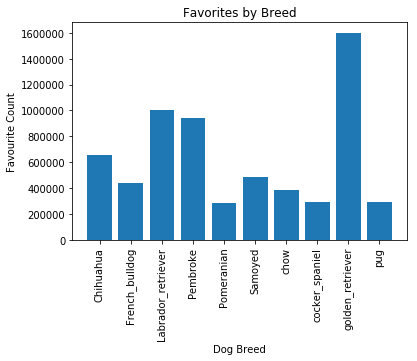

In [91]:
fig,ax = plt.subplots()
plot = plt.bar(breed,fav_count)
plt.xticks(rotation='vertical')
plt.xlabel('Dog Breed')
plt.ylabel('Favourite Count')
plt.title('Favorites by Breed');

The above bar plot has the top 10 favourite breeds. From the above bar plot, it can be seen that the Golden retriever is the most loved breed of dog. It leads the 2nd most favourite breed, the Labrador by a large number. The labrador is followed closely by Pembroke.

### Assessment 2: Most popular names of dogs
Now, based on the names of dogs available to us, we will see what are the most popular dog names.

In [88]:
dog_names = df_we_rate_dogs.name.value_counts()

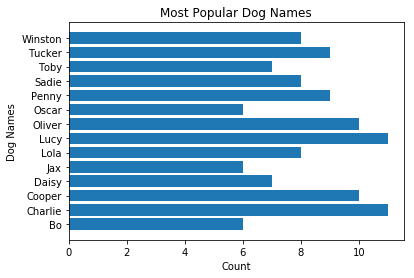

In [90]:
plt.barh(dog_names.keys()[0:14],dog_names.values[0:14]);
plt.xlabel('Count')
plt.ylabel('Dog Names')
plt.title('Most Popular Dog Names');

The above horizontal bar plot has the top 15 dog names in the twitter archives. As seen above, Lucy and Charlie are the most popular dog names. Followed closely are Cooper and Oliver.

### Assessment 3: Correlation between Retweet Count and Favourite Count 
We can see if the retweet count is correlated with the favourite count

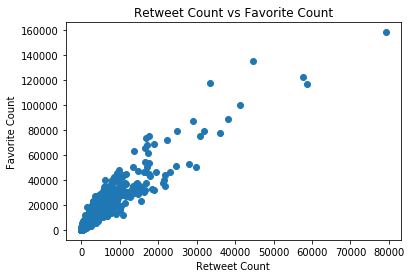

In [102]:
plt.scatter(df_we_rate_dogs.retweet_count,df_we_rate_dogs.favorite_count)
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.title('Retweet Count vs Favorite Count');

In [103]:
df_we_rate_dogs['retweet_count'].corr(df_we_rate_dogs['favorite_count'])

0.92712103531361234

The above scatter plot clearly shows that there is a strong positive correlation between the retweet counts and the favorite counts. Additionally, the calculated correlation coefficient is 0.92 as shown above, which is a very strong correlation